In [24]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
from lsst.utils import getPackageDir
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display, sim, baseline, proximal_nmf
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

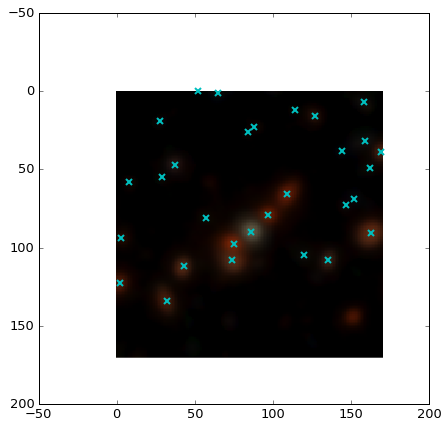

In [66]:
from astropy.table import Table
from astropy.io import fits

filters = ["g", "r", "i", "z"]

dataPath = os.path.abspath(os.path.join(lsst.utils.getPackageDir("testdata_deblender"),
                                        'real_data', 'cosmos_examples'))

peakTable = Table.read(os.path.join(dataPath, "example_26_cat.fits"))
imageList = []
for f in filters:
    img = fits.open(os.path.join(dataPath, "example_26_{0}.fits".format(f)))[0].data
    imageList.append(img)
images = np.array([i.tolist() for i in imageList])
peaks = [(peak["x"], peak["y"]) for peak in peakTable]
plt.figure(figsize=(7,7))
img = display.imagesToRgb(images, contrast=10)
plt.imshow(img)
plt.plot(peakTable["x"], peakTable["y"], "cx", mew=2)

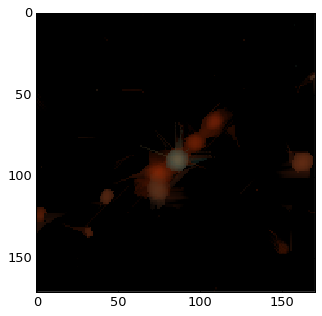

In [72]:
display.plotColorImage(model, contrast=10);

In [52]:
%time result = proximal_nmf.nmf_deblender(I=images, K=len(peakTable), max_iter=500,peaks=peaks, constraints="MS",l0_thresh=.5, e_rel=1e-2, psf_thresh=1e-2,monotonicUseNearest=True, algorithm="GLMM")

INFO:lsst.meas.deblender.proximal_nmf:Shape: (171, 171)
INFO:lsst.meas.deblender.proximal_nmf:Norm2: [ 241.82845159  241.826384  ]
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:499 iterations


CPU times: user 1min 30s, sys: 29.1 s, total: 2min
Wall time: 2min


In [53]:
A, S, model, P_, Tx, Ty, errors = result

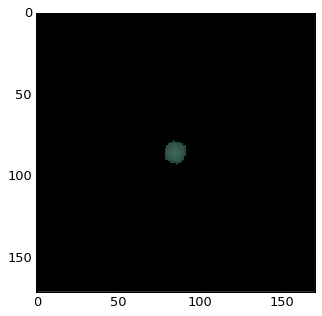

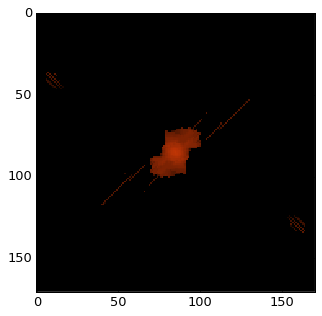

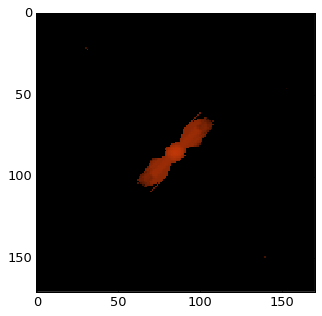

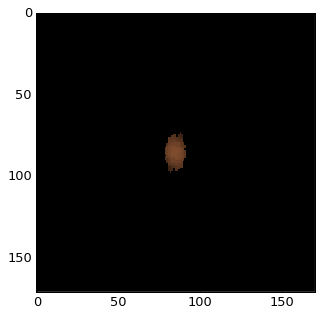

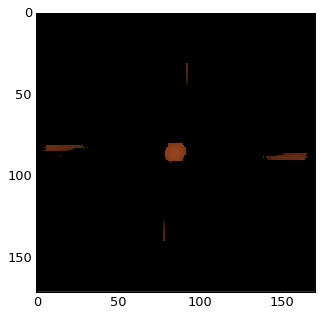

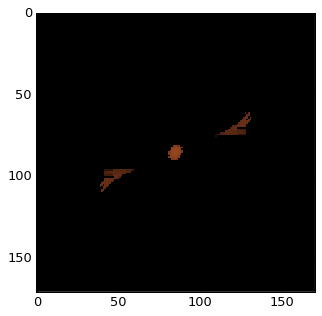

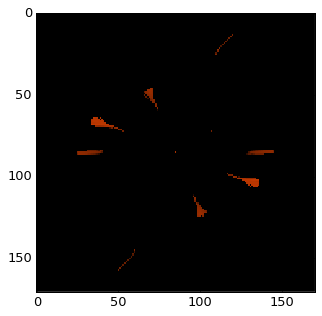

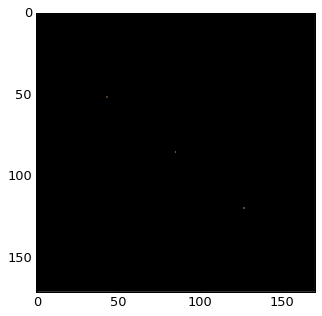

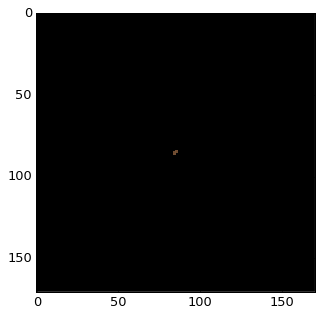

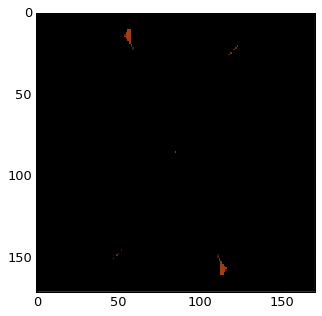

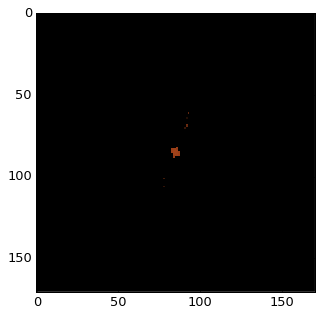

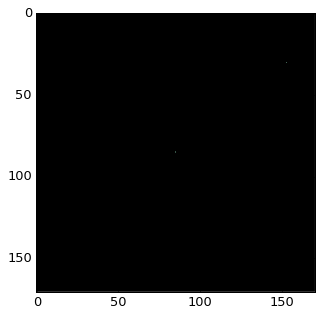

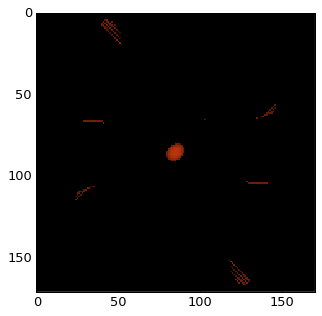

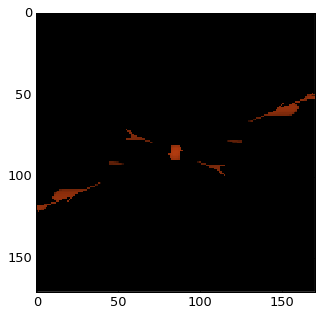

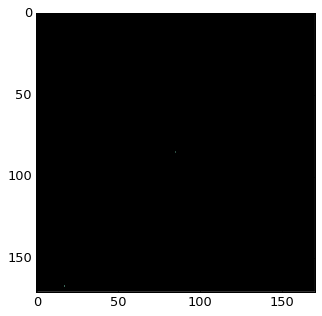

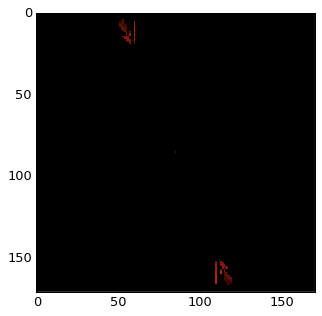

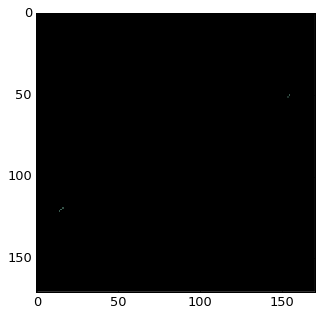

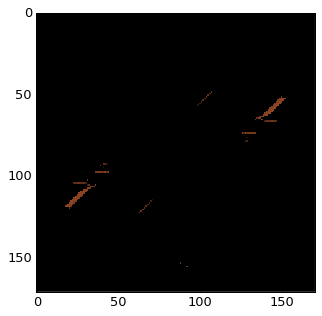

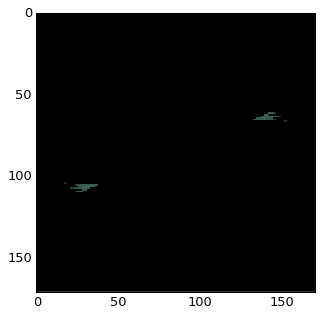

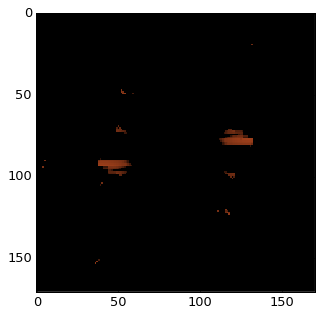

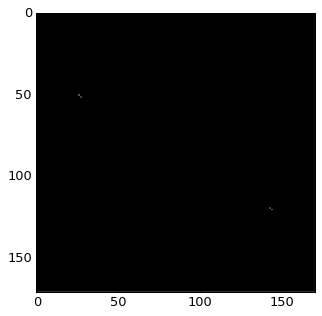

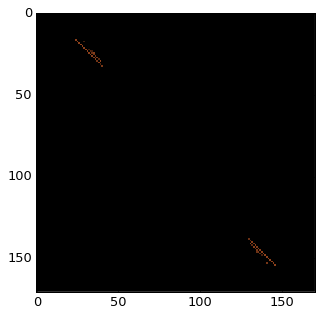

/Users/fred/lsst/code/meas_deblender/python/lsst/meas/deblender/display.py:82: RuntimeWarning: invalid value encountered in true_divide
  intensity = (intensity-np.min(intensity))/(np.max(intensity)-np.min(intensity))*255
/Users/fred/lsst/code/meas_deblender/python/lsst/meas/deblender/display.py:100: RuntimeWarning: invalid value encountered in less
  colors[colors<0] = 0


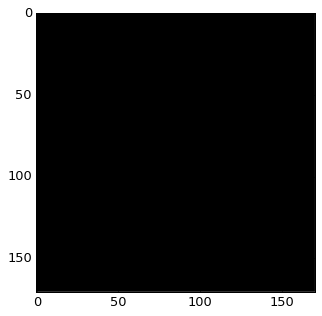

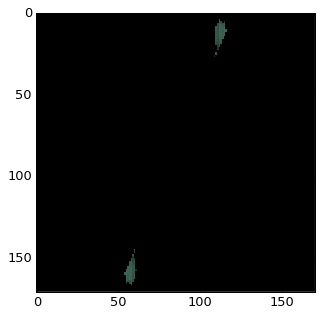

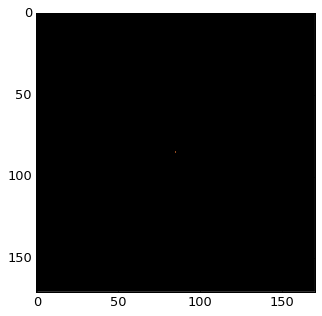

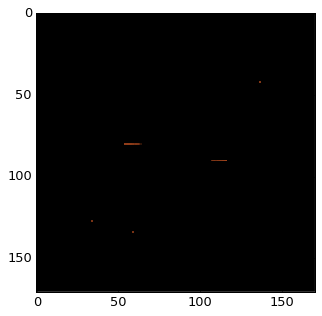

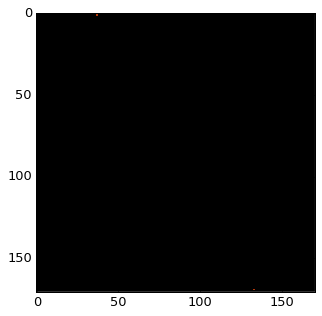

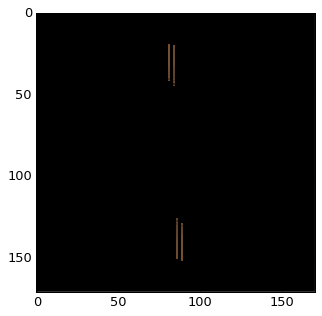

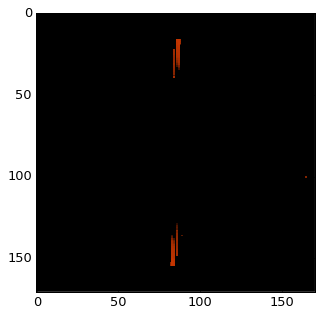

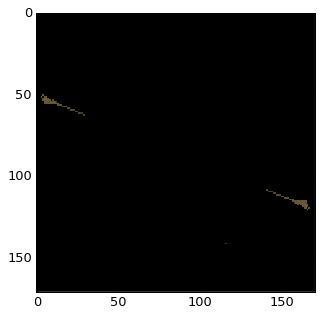

In [54]:
for k in range(S.shape[0]):
    Sk = S[k].reshape(model[0].shape)
    sk_images = np.array([(Ab[k]*Sk).tolist() for Ab in A])
    display.plotColorImage(sk_images)

4.14611005783


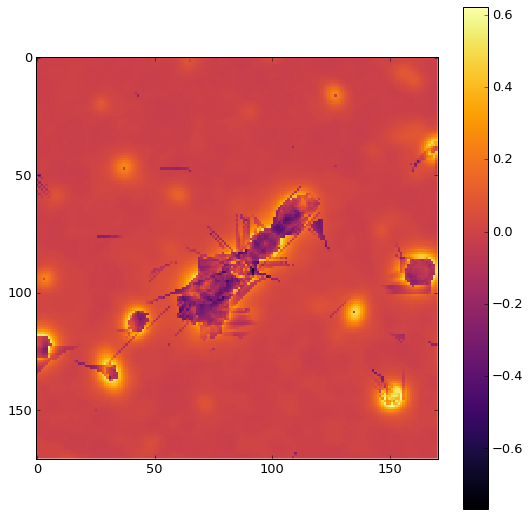

In [67]:
print(np.max(images[-1]))
plt.figure(figsize=(9,9))
plt.imshow((images-model)[-1])
plt.colorbar()
plt.show()

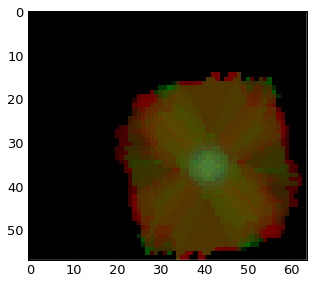

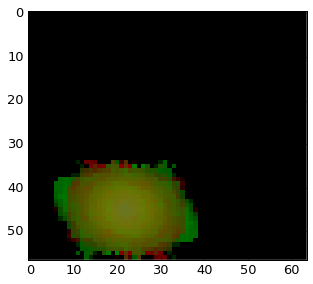

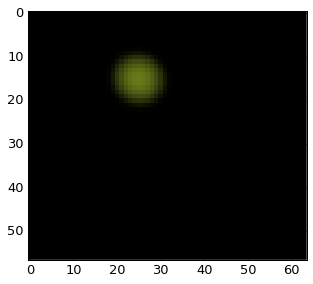

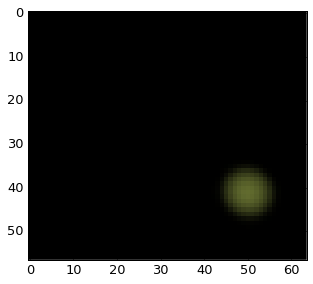

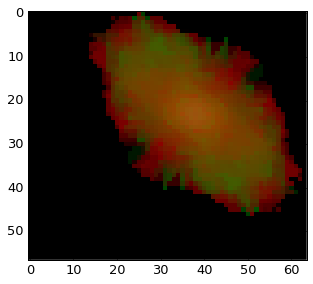

In [34]:
dbr = sim.deblendFootprintOld(filters, expDb, footprint, peakTable)
shape = (height, width)
for pk in range(len(simTable)):
    images = np.zeros((len(filters), shape[0], shape[1]))
    for fidx, f in enumerate(filters):
        bbox = dbr.peaks[pk].deblendedPeaks[f].templateImage.getBBox()
        pxmin = bbox.getMinX() - xmin
        pymin = bbox.getMinY() - ymin
        pxmax = pxmin + bbox.getWidth()
        pymax = pymin + bbox.getHeight()
        images[fidx, pymin:pymax, pxmin:pxmax] = dbr.peaks[pk].deblendedPeaks[f].templateImage.getArray()
    images = np.array(images)
    display.plotColorImage(images)